Transaction feature

In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv('sequence.csv')

df.shape

(278734, 27)

In [54]:
df.columns

Index(['user_id', 'txn_count_prev', 'total_income_prev', 'total_expense_prev',
       'mean_amount', 'user_gender', 'user_current_age', 'user_yearly_income',
       'user_per_capita_income', 'user_credit_score', 'user_total_debt',
       'user_birth_month', 'card_num_cards_issued', 'user_latitude',
       'user_longitude', 'year_to_retirement', 'debt_to_yearly_income_ratio',
       'income_per_card', 'multi_card_user', 'income_utilization_ratio',
       'credit_utilization_ratio', 'oldest_card_age_years',
       'weekend_spend_ratio', 'correlation_with_trend',
       'risk_of_default_score', 'risk_level', 'Cluster'],
      dtype='object')

In [55]:
sequence_update = df[['user_id', 'total_income_prev', 'total_expense_prev','user_yearly_income','user_per_capita_income']].copy()

sequence_update.head()

,user_id,total_income_prev,total_expense_prev,user_yearly_income,user_per_capita_income
0,0,0.0,0.0,59613.0,29237.0
1,0,0.0,0.0,59613.0,29237.0
2,0,5031.4,-436.0,59613.0,29237.0
3,0,5031.4,-436.0,59613.0,29237.0
4,0,5430.8,-470.0,59613.0,29237.0


In [56]:
sequence_update['percentage_prev_expense_as_income'] = abs((-sequence_update['total_expense_prev'] / sequence_update['total_income_prev']) * 100).fillna(0).round(1)

sequence_update['percentage_prev_monthly_income_as_yearly'] = ((sequence_update['total_income_prev'] / sequence_update['user_yearly_income']) * 100).fillna(0).round(1)

sequence_update['percentage_prev_monthly_income_as_capita'] = ((sequence_update['total_income_prev'] / sequence_update['user_per_capita_income']) * 100).replace([np.inf, -np.inf], np.nan).fillna(0).round(1)

sequence_update['prev_monthly_net_savings'] = (sequence_update['total_income_prev'] - abs(sequence_update['total_expense_prev'])).fillna(0).round(1)



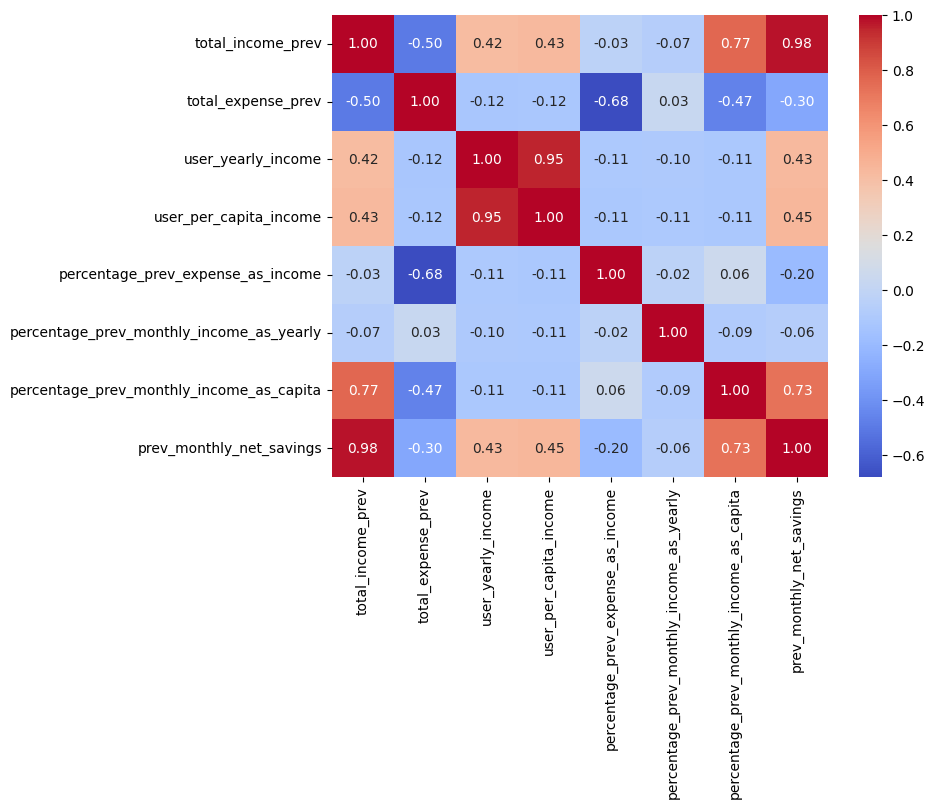

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

X = sequence_update.drop(['user_id'], axis=1,inplace=False)
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
sequence_update.drop(['total_income_prev', 'total_expense_prev','user_yearly_income','user_per_capita_income'], axis=1, inplace=True)

sequence_update.head(50)

,user_id,percentage_expense_as_income,percentage_monthly_income_as_yearly,percentage_monthly_income_as_capita,monthly_net_savings,percentage_prev_expense_as_income,percentage_prev_monthly_income_as_yearly,percentage_prev_monthly_income_as_capita,prev_monthly_net_savings
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,8.7,8.4,17.2,4595.4,8.7,8.4,17.2,4595.4
3,0,8.7,8.4,17.2,4595.4,8.7,8.4,17.2,4595.4
4,0,8.7,9.1,18.6,4960.8,8.7,9.1,18.6,4960.8
5,0,8.7,9.1,18.6,4960.8,8.7,9.1,18.6,4960.8
6,0,12.0,11.3,23.0,5908.2,12.0,11.3,23.0,5908.2
7,0,12.0,11.3,23.0,5908.2,12.0,11.3,23.0,5908.2
8,0,4.1,9.6,19.5,5467.2,4.1,9.6,19.5,5467.2
9,0,4.1,9.6,19.5,5467.2,4.1,9.6,19.5,5467.2


In [41]:
sequence_update.to_csv('sequence_update.csv', index=False)